## Q1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions. (Minitab File : Cutlets.mtw)

ANS 1:Two sample t-test will be used here:

 also is known as Independent t-test — it compares the means of two independent groups and determines whether there is statistical evidence that the associated population means are significantly different.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Cutlets.csv to Cutlets.csv


In [ ]:
# Load the dataset
data= pd.read_csv('Cutlets.csv')
data.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [ ]:
unitA= pd.Series(data.iloc[:,0])
unitA

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [ ]:
unitB= pd.Series(data.iloc[:,1])
unitB

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

In [ ]:
# 2 sample 2-tail ttest: stats.ttest_ind(array1, array2)  # ind = independent samples
p_value = stats.ttest_ind(unitA, unitB)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [ ]:
p_value[1] # 2- tail probability

0.4722394724599501

In [ ]:
# compare p_value with alpha= 0.05 (At 5% significance)
if p_value[1] < 0.05:  # alpha value is 0.05/5%
  print("We are rejecting null hypothesis") #  that there's no difference between the means and conclude that a significant difference does exist.
else:
  print("We are accepting null hypothesis")

We are accepting null hypothesis


## Q2. A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch. 
##Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.( Minitab File: LabTAT.mtw)

ANS 2: ANOVA Test will be used here:

It is also called an analysis of variance and is used to compare multiple (three or more) samples with a single test. It is used when the categorical feature has more than two categories.

The hypothesis being tested in ANOVA is

Null: All pairs of samples are same i.e. all sample means are equal

Alternate: At least one pair of samples is significantly different

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import f_oneway

''' We are going to conduct a ANOVA Test on 4 Independent samples with Numerical Data
We need to check whether the mean of any of these samples are different or the same?

Step 1.
Make two Hypothesis one contradicting to other

Null Hypothesis is what we want to prove

Null Hypothesis: no difference

Alternative Hypthosis: Atleast One of them is Differente

Step 2.
Decide a cut-off value

Significance 5%
alpha: 0.05'''

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving LabTAT.csv to LabTAT.csv


In [ ]:
# Load the dataset
labdata= pd.read_csv('LabTAT.csv')
labdata.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [ ]:
labdata.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [ ]:
# Anova ftest statistics: stats.f_oneway(column-1,column-2,column-3,column-4)
p_value=stats.f_oneway(labdata.iloc[:,0],labdata.iloc[:,1],labdata.iloc[:,2],labdata.iloc[:,3])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [ ]:
p_value[1]

2.1156708949992414e-57

In [ ]:
if p_value[1] < 0.05:  # alpha value is 0.05/5%
  print("We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories")
else:
  print("We are accepting null hypothesis")

We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


##Q3. Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions. 
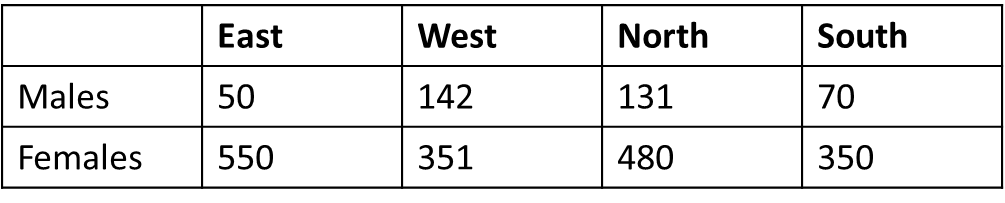

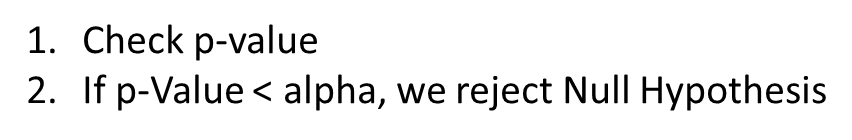

ANS 3:  Chi-Squared Test Of Independence will be used here

Allows you to test whether there is a relationship between two variables. But, it does not tell you the direction or the size of the relationship.

A chi-square test of independence is used to determine whether or not there is a significant association between two categorical variables.

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving BuyerRatio.csv to BuyerRatio (1).csv


In [ ]:
buyer= pd.read_csv('BuyerRatio.csv', index_col= 0)
buyer.head()

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [ ]:
buyer.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [ ]:
# chi2 contengency independence test
chi2= stats.chi2_contingency(buyer) # o/p is (chi2 stats value, p_value, df, expected observation)
p_value= chi2[1]
print('P_value', p_value)

P_value 0.6603094907091882


In [ ]:
alpha = 0.05
print('Significance=%.3f, p_value=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significance=0.050, p_value=0.660
We fail to reject Null hypothesis


# Q4. TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

Minitab File: CustomerOrderForm.mtw

ANS 4: Chi-Squared Test Of Independence will be used here

Allows you to test whether there is a relationship between two variables. But, it does not tell you the direction or the size of the relationship.

A chi-square test of independence is used to determine whether or not there is a significant association between two categorical variables.

In [ ]:
import pandas as pd
import numpy as np
import scipy as stats
import scipy.stats as norm
from scipy.stats import chi2_contingency

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Costomer+OrderForm.csv to Costomer+OrderForm (1).csv


In [ ]:
order= pd.read_csv("Costomer+OrderForm.csv")
order

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [ ]:
order.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [ ]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [ ]:
chisquare= chi2_contingency([order['Phillippines'].value_counts(), order['Indonesia'].value_counts(), order['Malta'].value_counts(), order['India'].value_counts()])
chisquare

(3.8589606858203545, 0.2771020991233144, 3, array([[271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25],
        [271.75,  28.25]]))

In [ ]:
p_value= chisquare[1]
print("P_value", p_value)

P_value 0.2771020991233144


In [ ]:
alpha = 0.05
print('Significance=%.3f, p_value=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference')
else:
    print('We fail to reject Null hypothesis')

Significance=0.050, p_value=0.277
We fail to reject Null hypothesis
